In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [5]:
dataset = pd.read_csv('./dataset/marketing_campaign.csv', sep='\t')
dataset.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [8]:
dataset.duplicated().sum()

0

## Feature engineering

In [10]:
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_16484\1666417313.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [11]:
print("The newest customer's enrolment date in the records:", max(dataset['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(dataset['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [12]:
dataset['Age'] = 2015 - dataset['Year_Birth']

In [13]:
# Create another feature "Spent" indicating the total amount spent
dataset['Spent'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] + \
                    dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']

In [14]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living of couples.
dataset['Living_With'] = dataset['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner',\
                'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})


In [15]:
# Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
dataset['Children'] = dataset['Kidhome'] + dataset['Teenhome']

In [16]:
# To get further clarity of household, Creating feature indicating "Family_Size"
dataset['Family_Size'] = dataset['Living_With'].replace({'Alone': 1, 'Partner':2}) + dataset['Children']

In [17]:
dataset['Is_Parent'] = np.where(dataset.Children > 0, 1, 0)

In [18]:
dataset['Education'] = dataset['Education'].replace({'Basic':'Undergraduate',\
        '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [19]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
dataset = dataset.drop(to_drop, axis=1)

In [20]:
dataset.head(5)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Age  Spent  Living_With  Children  \
0             0         0         1   58   1617        Alone         0   
1             0         0         0   61     27        Alone         2   
2             0         0         0   50    776      Partner         0   
3             0         0         0   31     53      Partner         1   
4             0         0         0   34    422      Partner         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1  

[5 rows x 29 columns]

## Data analysis and data visualization

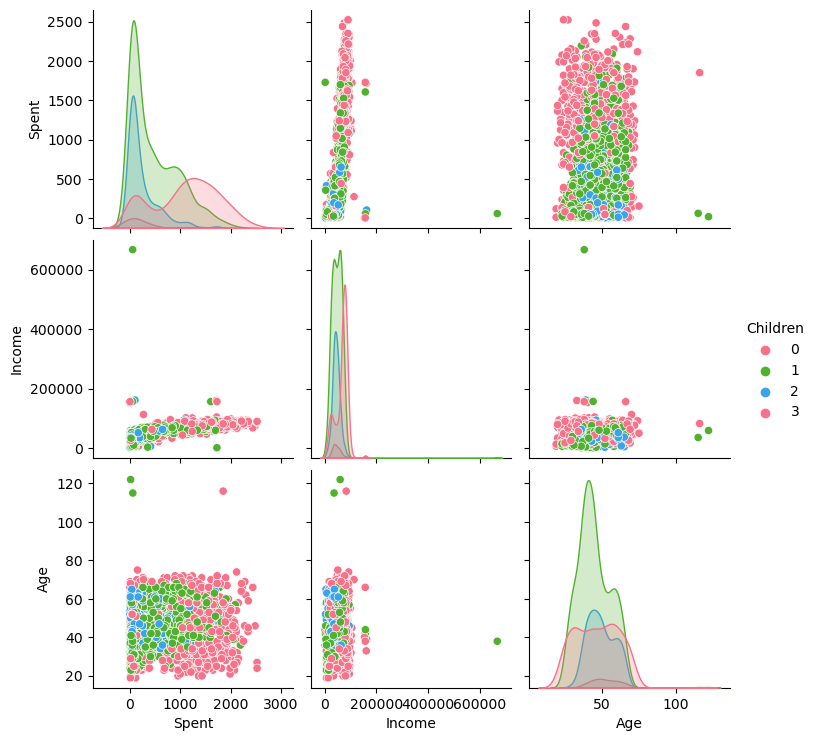

In [22]:
sns.pairplot(dataset , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

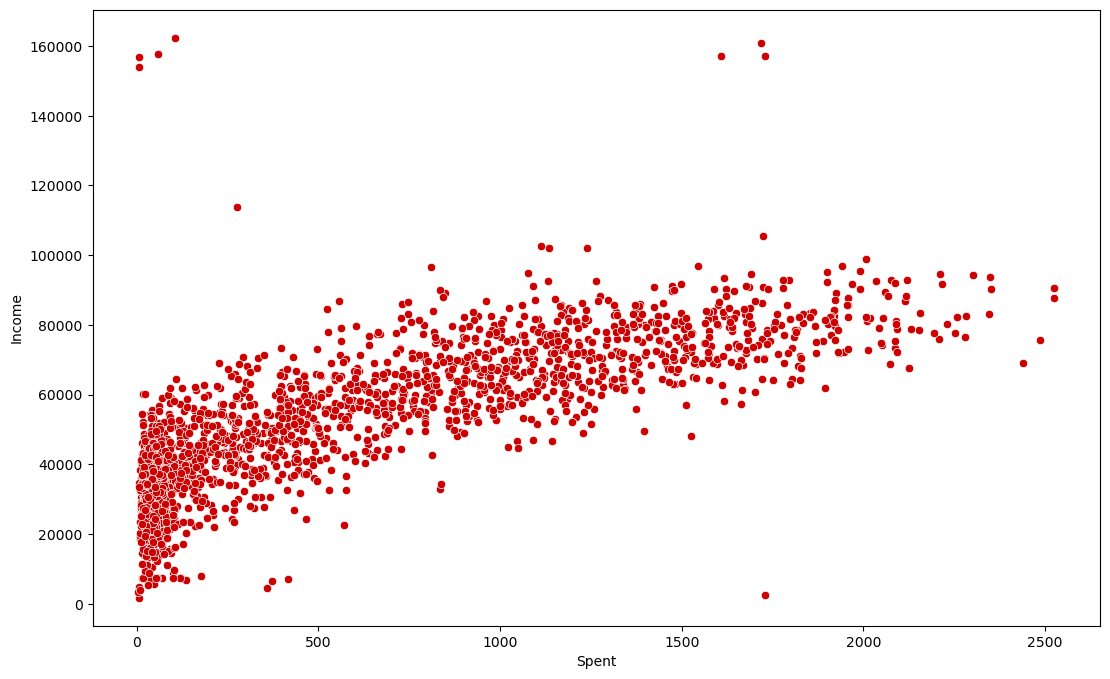

In [23]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=dataset[dataset['Income']<600000]['Spent'], \
                y=dataset[dataset['Income']<600000]['Income'], color='#cc0000');

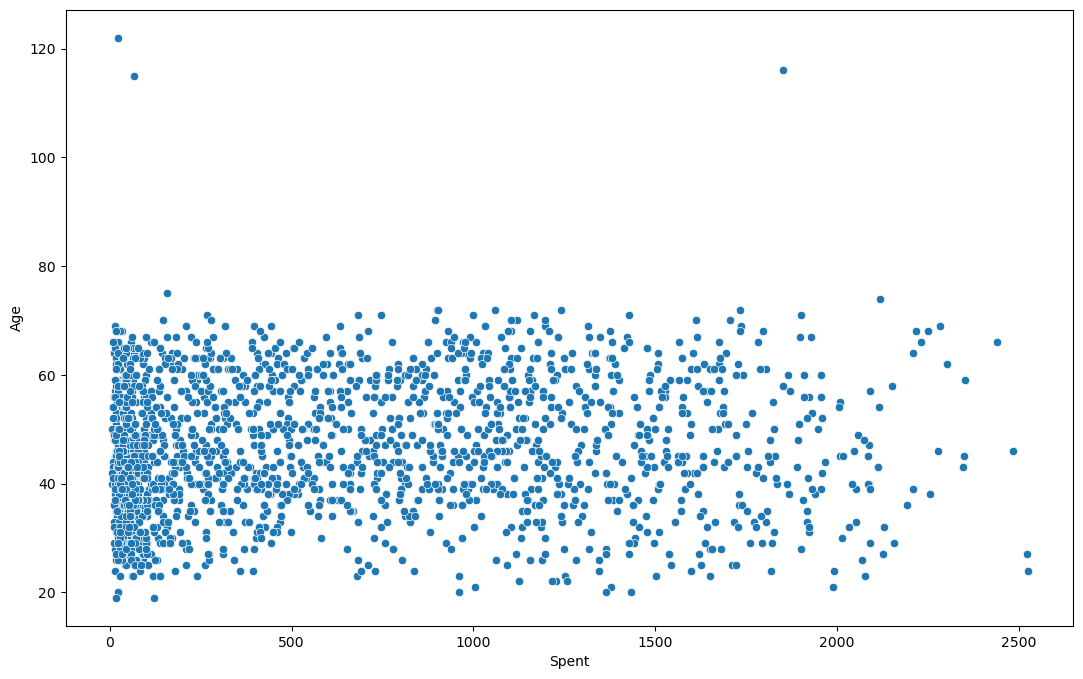

In [24]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=dataset['Spent'], y=dataset['Age']);

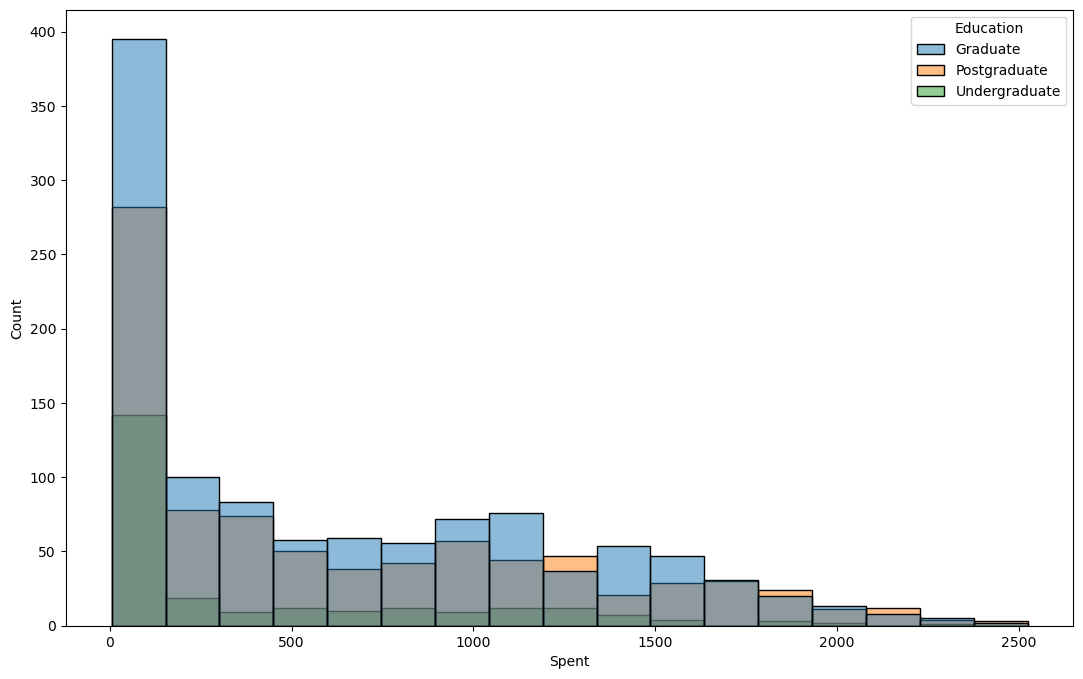

In [25]:
plt.figure(figsize=(13,8))
sns.histplot(x=dataset['Spent'], hue=dataset['Education']);

## Outlier detection

C:\Users\ACER\AppData\Local\Temp\ipykernel_16484\2534383304.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




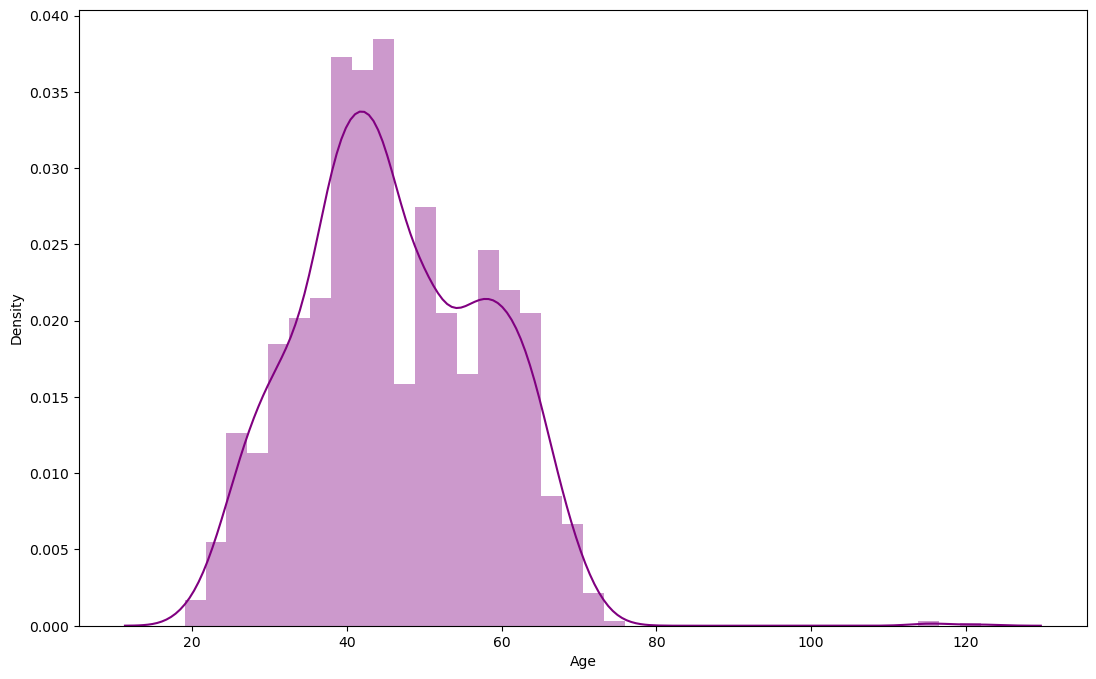

In [26]:
plt.figure(figsize=(13,8))
sns.distplot(dataset.Age, color='purple');

C:\Users\ACER\AppData\Local\Temp\ipykernel_16484\233628578.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




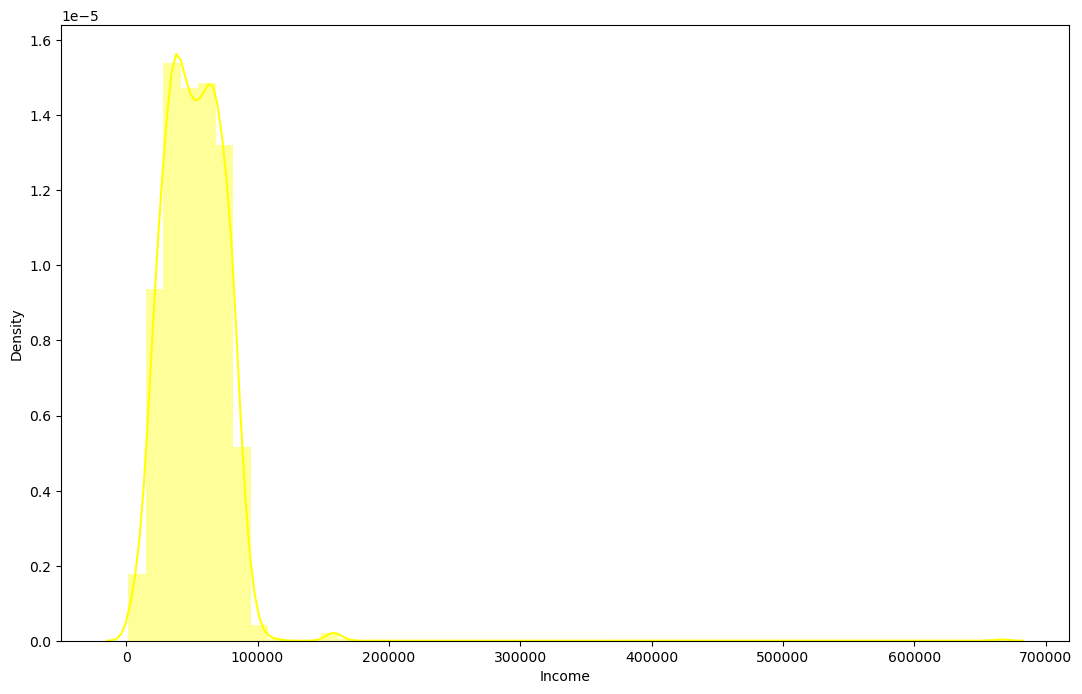

In [27]:
plt.figure(figsize=(13,8))
sns.distplot(dataset.Income, color='Yellow');

C:\Users\ACER\AppData\Local\Temp\ipykernel_16484\1448795717.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




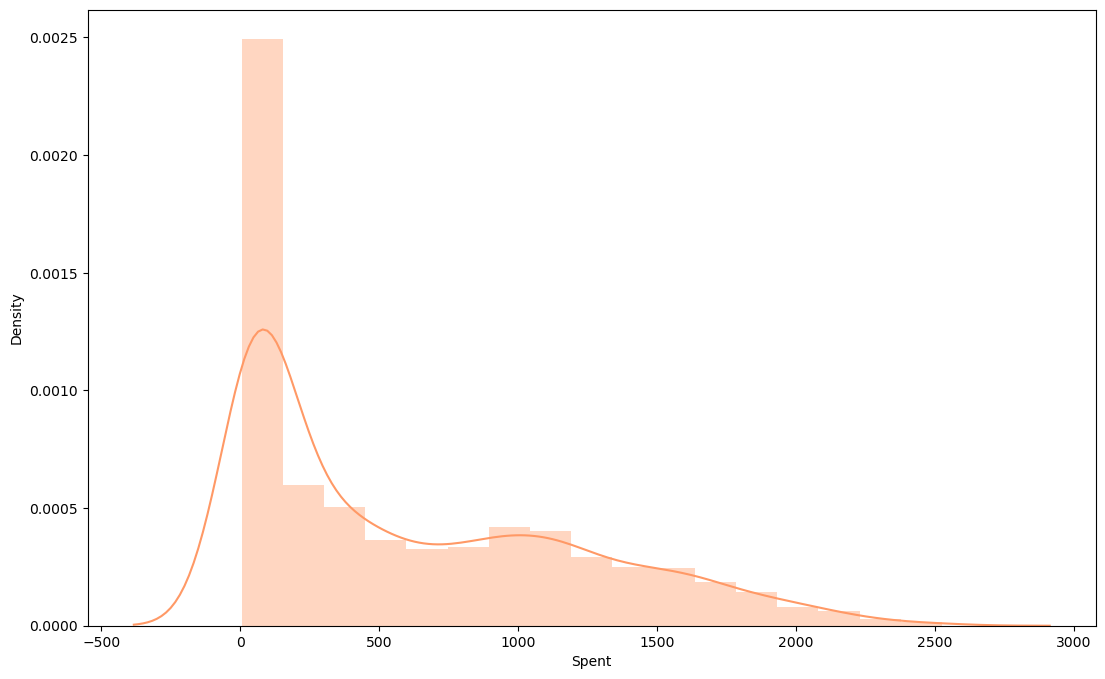

In [29]:
plt.figure(figsize=(13,8))
sns.distplot(dataset.Spent, color='#ff9966');

In [30]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=dataset['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=dataset['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=dataset['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [31]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [34]:
def detect_outliers(d):
    for i in d:
        Q3, Q1 = np.percentile(dataset[i], [75 ,25])
        IQR = Q3 - Q1

        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR

        outliers = dataset[i][(dataset[i] > ul) | (dataset[i] < ll)]
        print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [35]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [36]:
dataset = dataset[(dataset['Age']<100)]
dataset = dataset[(dataset['Income']<600000)]

## Data transformation

In [39]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
categorical

['Education', 'Living_With']

In [41]:
dataset['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [42]:
dataset['Education'] = dataset['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [43]:
dataset['Living_With'] = dataset['Living_With'].map({'Alone':0,'Partner':1})

<Axes: >

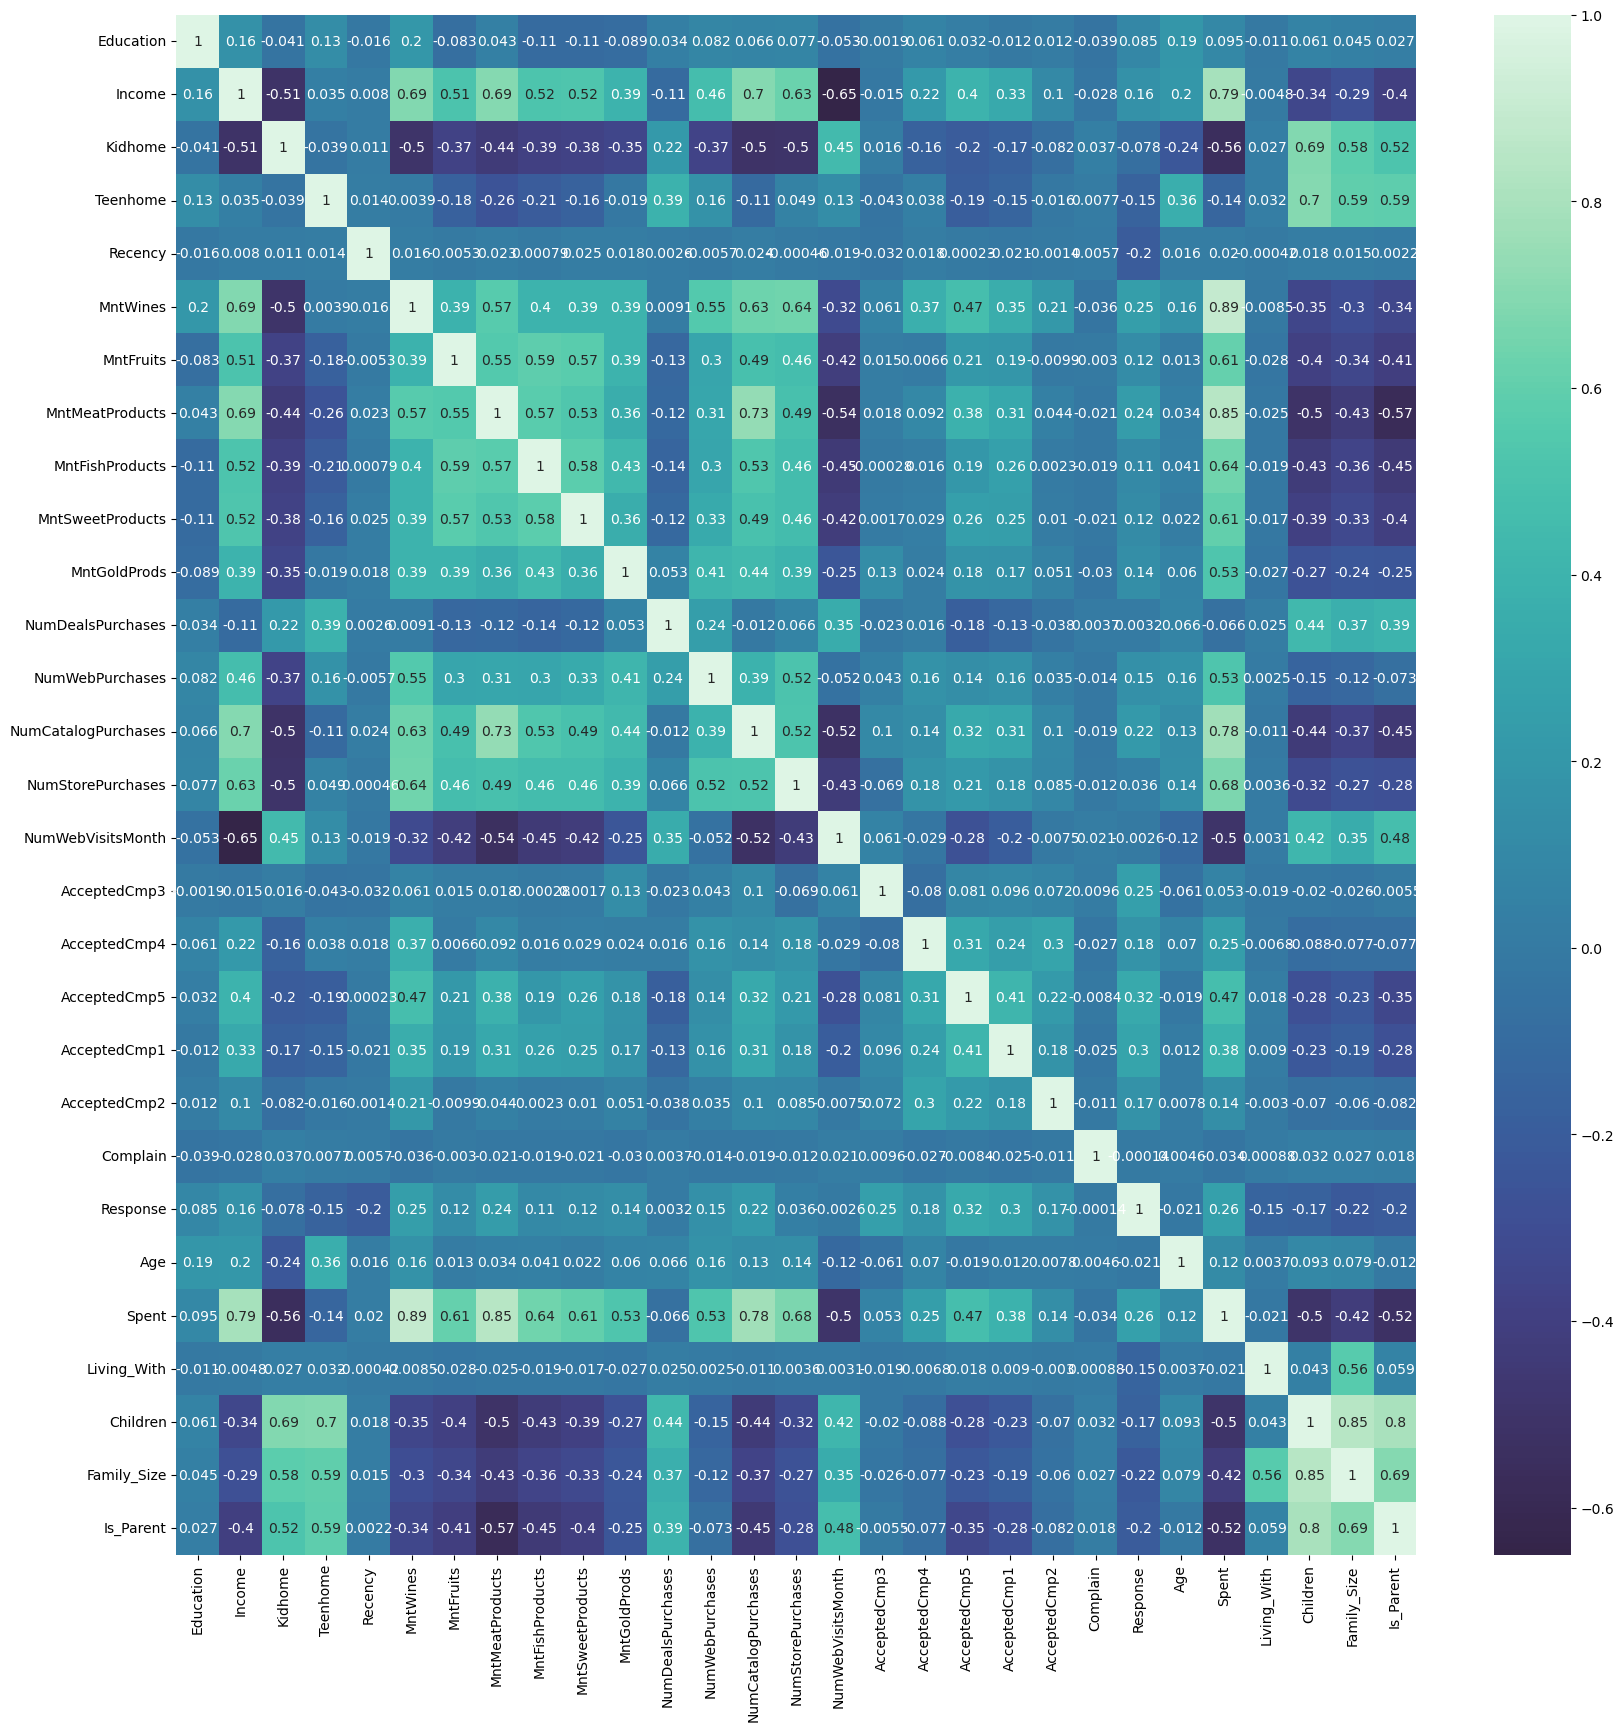

In [44]:
corrmat = dataset.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
dataset_old = dataset.copy()

In [48]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',\
            'AcceptedCmp2', 'Complain', 'Response']
dataset = dataset.drop(cols_del, axis=1)

In [50]:
scaler = StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)

## Reduce dimension

In [51]:
from sklearn.decomposition import PCA

In [52]:
p = PCA(n_components=3)
p.fit(dataset)

PCA(n_components=3)

In [53]:
W = p.components_.T

In [54]:
pd.DataFrame(W, index=dataset.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.011347  0.140717 -0.506899
Income               0.279487  0.178236 -0.075307
Kidhome             -0.246223  0.005230  0.282970
Teenhome            -0.098709  0.462101 -0.151598
Recency              0.003527  0.016260  0.035953
MntWines             0.255717  0.209386 -0.116834
MntFruits            0.238398  0.011095  0.254488
MntMeatProducts      0.285462  0.009916  0.076677
MntFishProducts      0.248710  0.000234  0.253619
MntSweetProducts     0.237302  0.021612  0.257483
MntGoldProds         0.188380  0.123073  0.199446
NumDealsPurchases   -0.078260  0.348730  0.152403
NumWebPurchases      0.167560  0.296792  0.023039
NumCatalogPurchases  0.277349  0.105970  0.016547
NumStorePurchases    0.241543  0.205473 -0.007340
NumWebVisitsMonth   -0.225949  0.046106  0.091025
Age                  0.038465  0.234790 -0.428615
Spent                0.320099  0.133706  0.037648
Living_With         -0.027576  0.125510  0.300419
Children            -0.248087  0.339319  0.092646
Family_Size         -0.219730  0.346883  0.235225
Is_Parent           -0.242808  0.292283  0.081720

In [55]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.375951
2               0.132709
3               0.064998

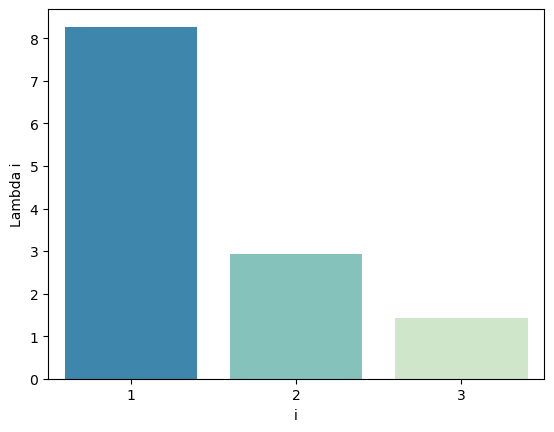

In [56]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [57]:
dataset_PCA = pd.DataFrame(p.transform(dataset), columns=(['col1', 'col2', 'col3']))

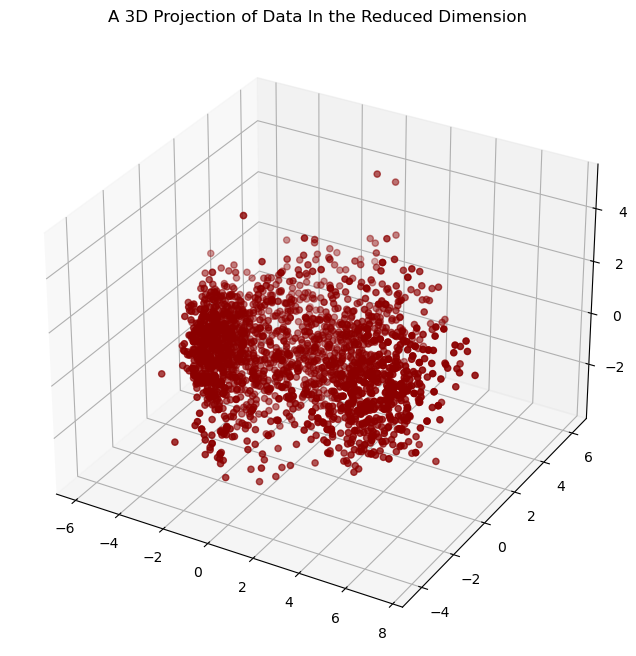

In [58]:
x = dataset_PCA['col1']
y = dataset_PCA['col2']
z = dataset_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

## Clustering

In [61]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [62]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(dataset_PCA)
dataset_PCA['Clusters'] = yhat_AC
dataset['Clusters'] = yhat_AC
dataset_old['Clusters'] = yhat_AC

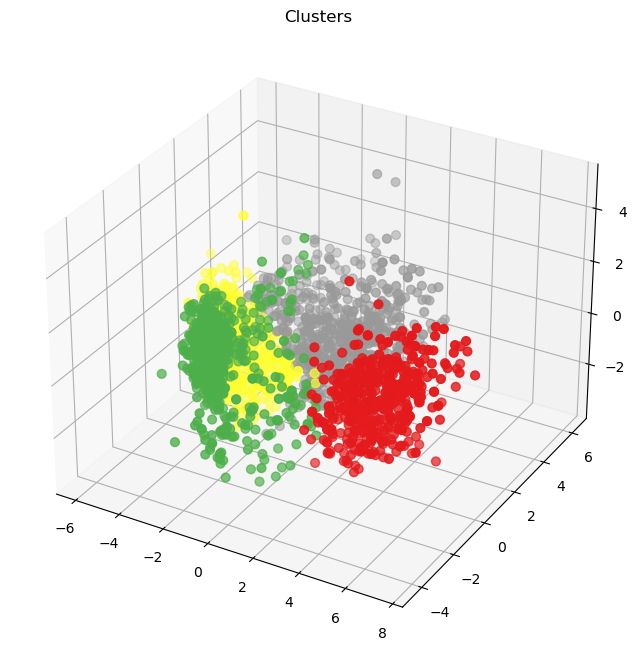

In [63]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=dataset_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

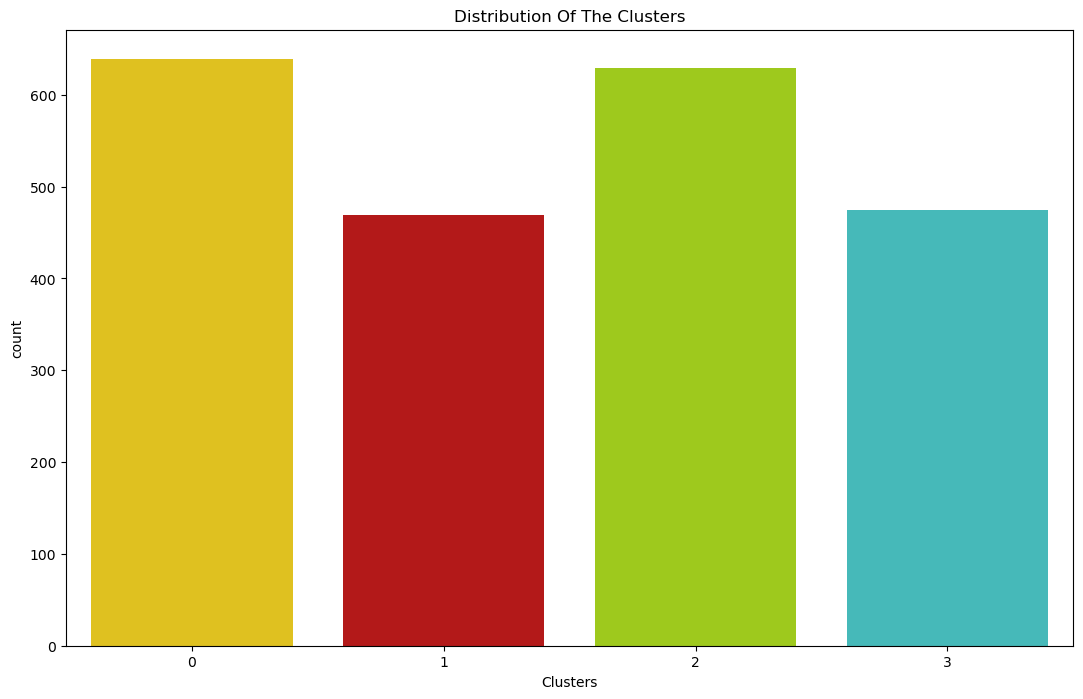

In [64]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=dataset['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

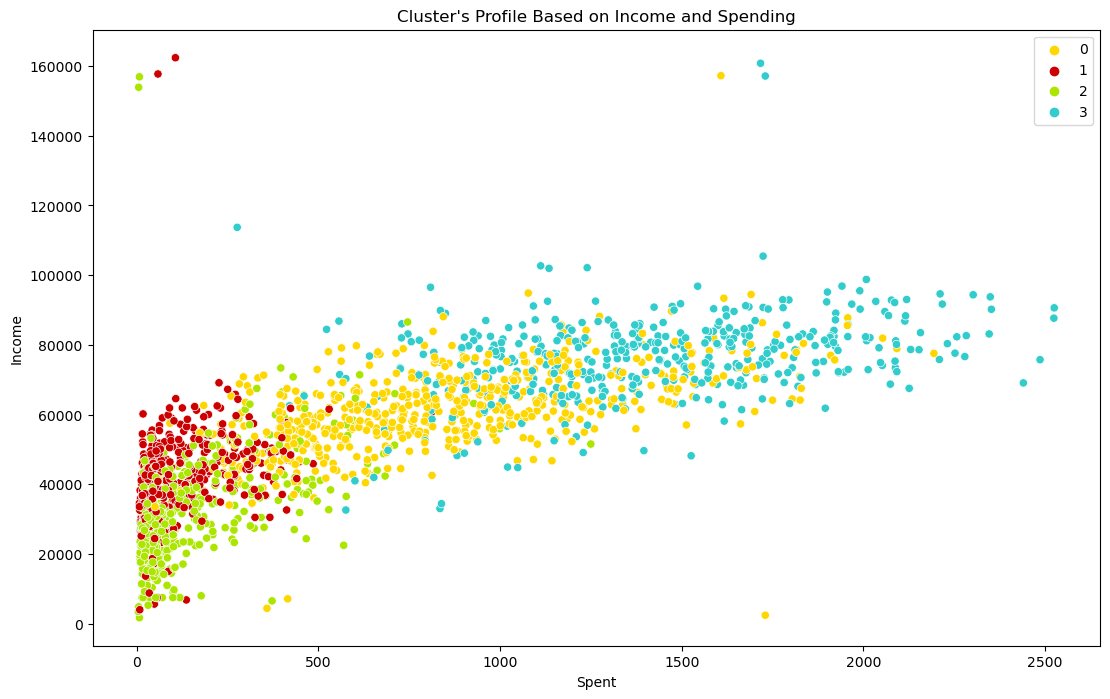

In [66]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=dataset_old, x=dataset_old['Spent'], \
                     y=dataset_old['Income'], hue=dataset_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



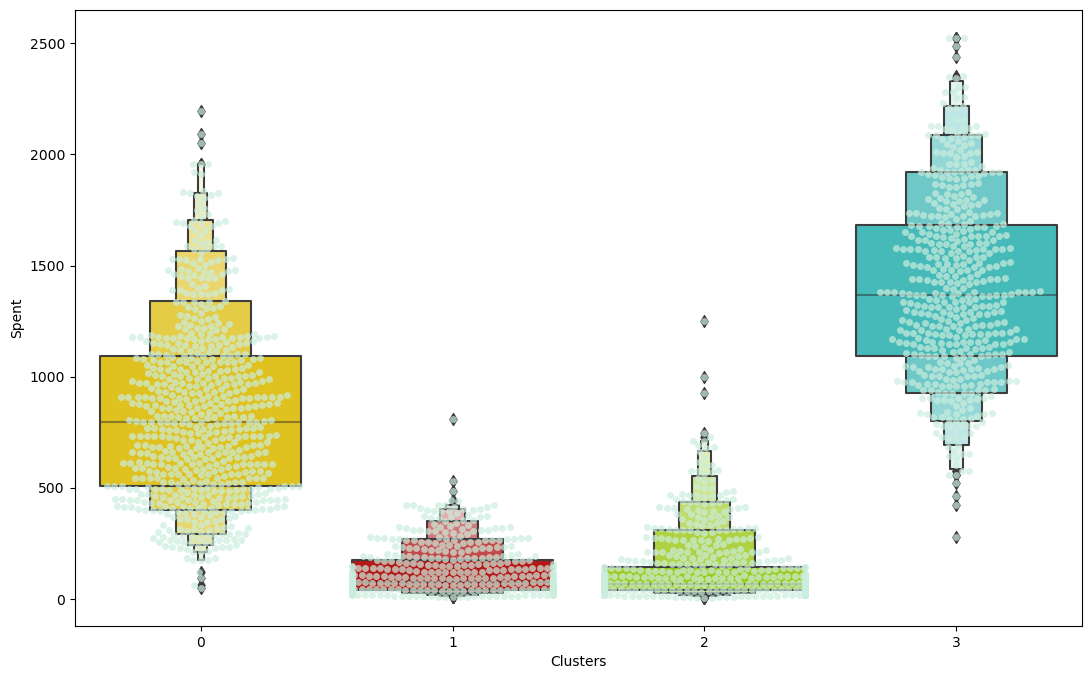

In [67]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=dataset_old['Clusters'], y=dataset_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=dataset_old['Clusters'], y=dataset_old['Spent'], palette=pal)
plt.show();

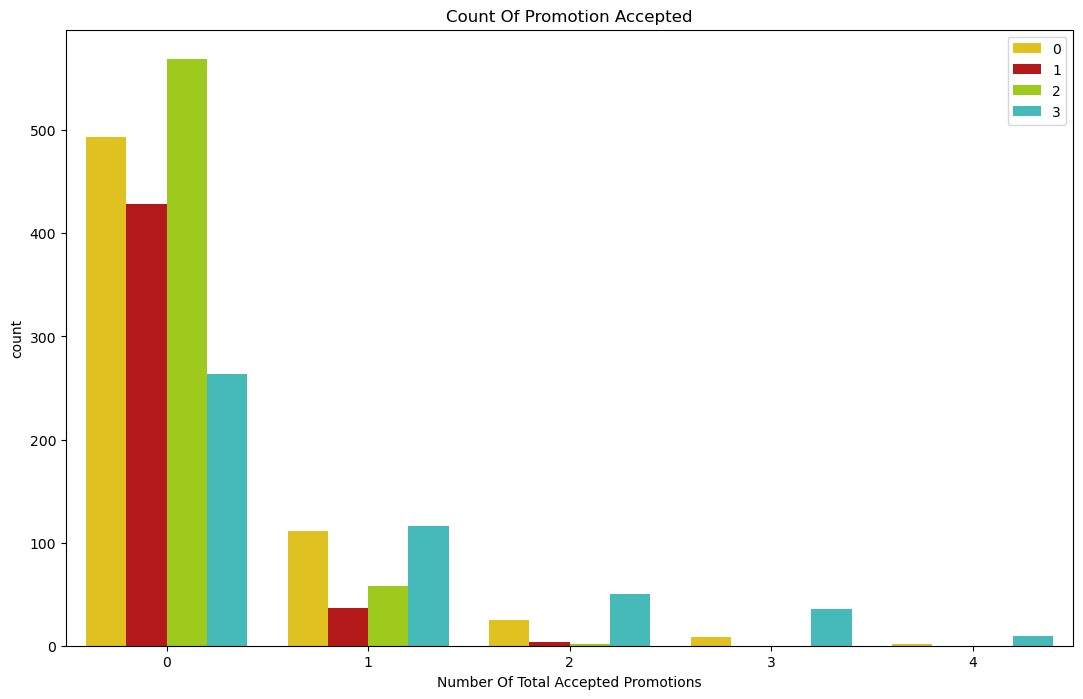

In [68]:
dataset_old['Total_Promos'] = dataset_old['AcceptedCmp1']+ dataset_old['AcceptedCmp2']+\
            dataset_old['AcceptedCmp3']+ dataset_old['AcceptedCmp4']+ dataset_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=dataset_old['Total_Promos'], hue=dataset_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

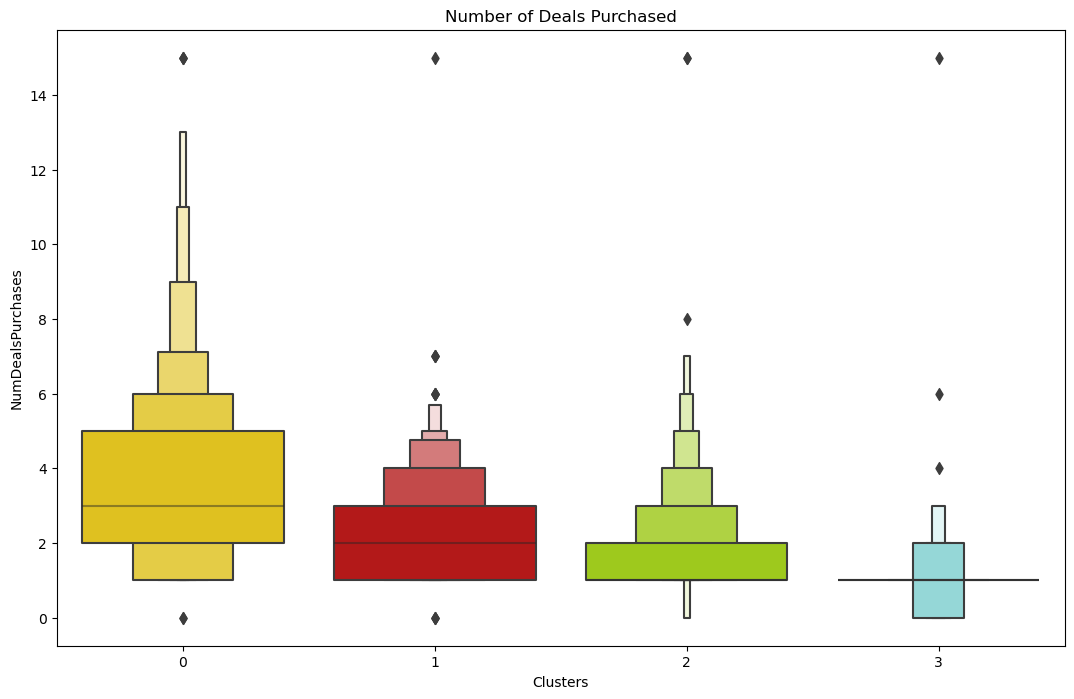

In [69]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=dataset_old['NumDealsPurchases'],x=dataset_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 1300x800 with 0 Axes>

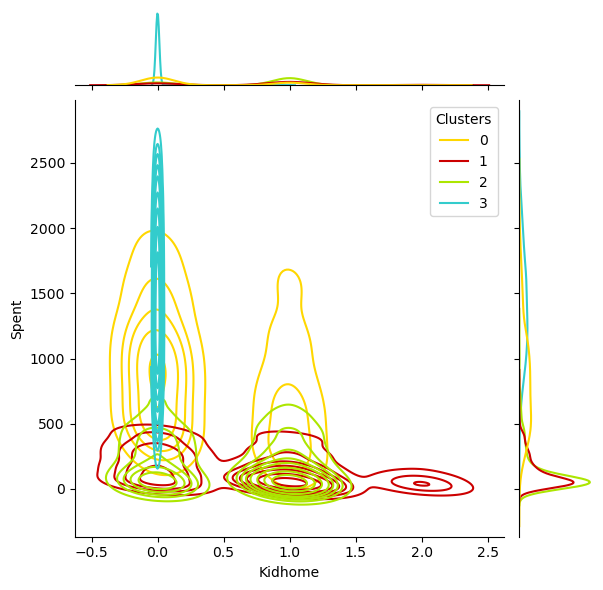

<Figure size 1300x800 with 0 Axes>

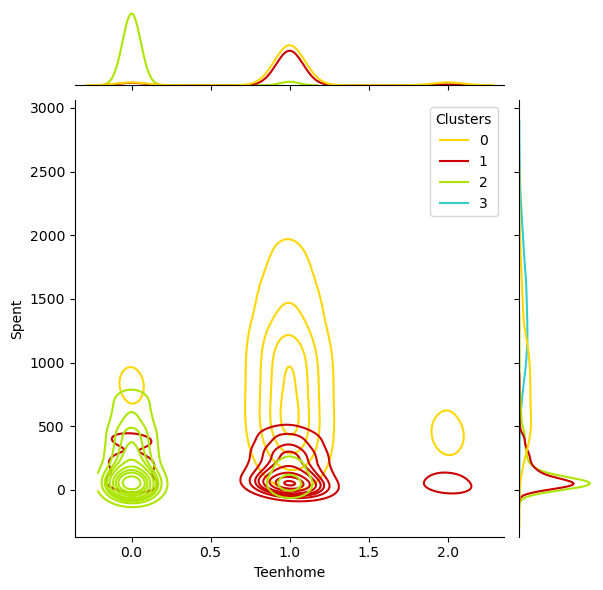

<Figure size 1300x800 with 0 Axes>

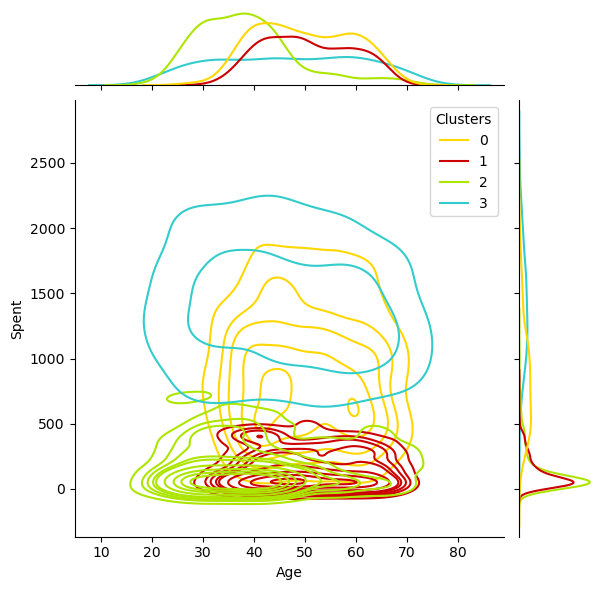

<Figure size 1300x800 with 0 Axes>

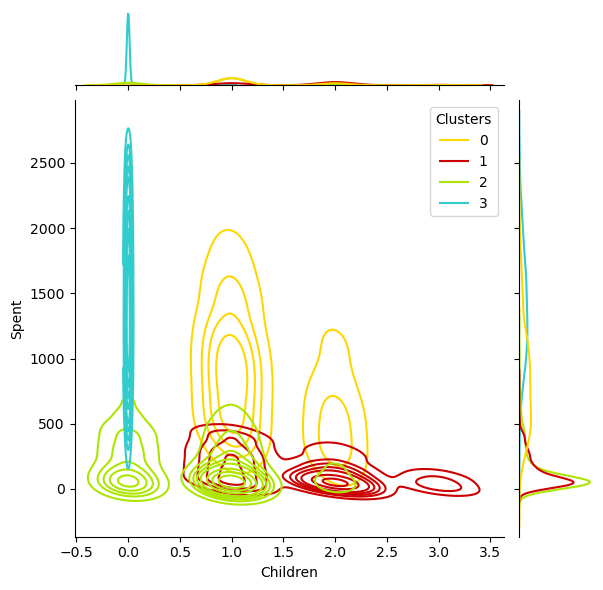

<Figure size 1300x800 with 0 Axes>

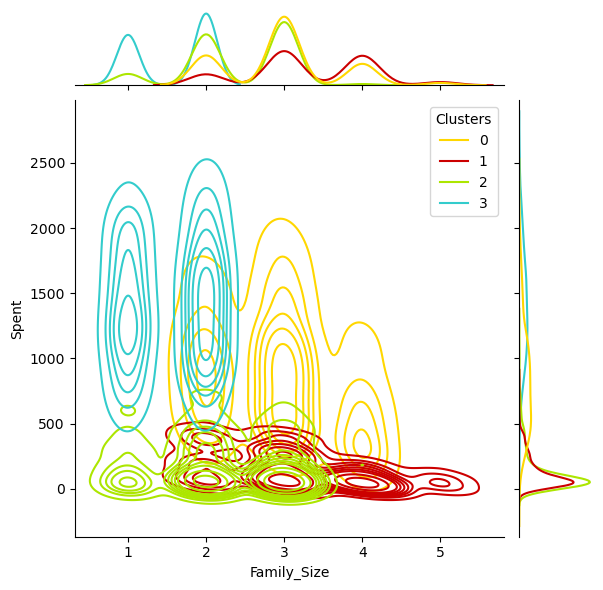

<Figure size 1300x800 with 0 Axes>

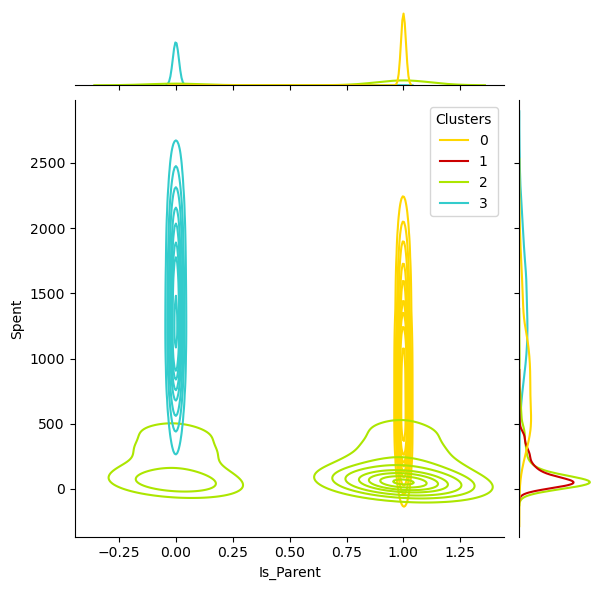

<Figure size 1300x800 with 0 Axes>

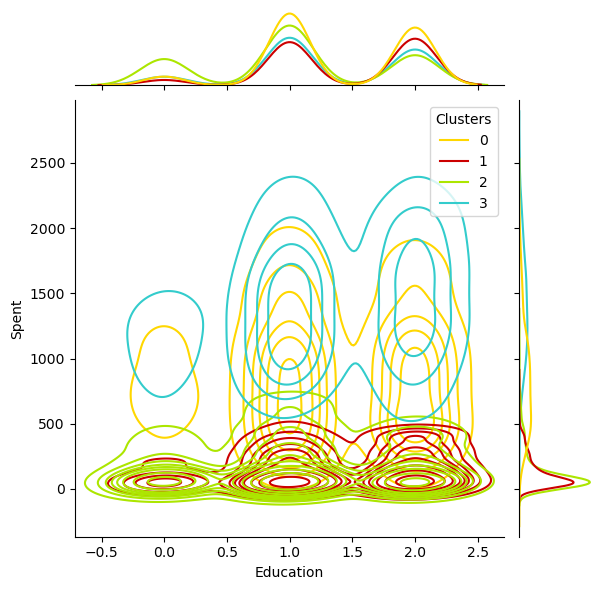

<Figure size 1300x800 with 0 Axes>

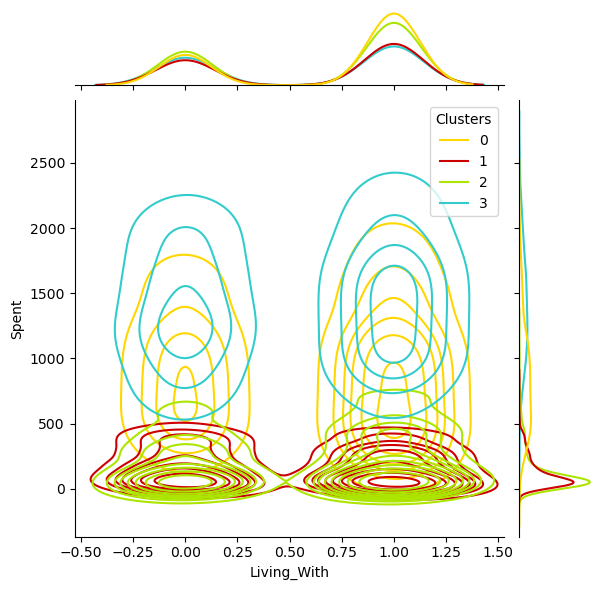

In [70]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=dataset_old[i], y=dataset_old['Spent'], hue=dataset_old['Clusters'], \
                  kind='kde', palette=pal);


### About Cluster 0:

* The majority of these people are parents
* At max have 3 members in the family
* They majorly have one kid and typically not tennagers
* Relatively younger
### About Cluster 1:

* Definitely a parent
* At max have 4 members in the family and at least 2
* Most have a teeanger in home
* Single parents are a subset of this group
* Relatively older
### About Cluster 2:

* Definitely not a parent
* At max are only 2 members in the family.
* A slight majority of couples over single people
* Span all ages
* high income and high spending
### About Cluster 3:

* Definitely a parent
* At max have 5 members in the family and at least 2
* Majority of them have a teenager at home
* Relatively older